# Loan Default Data Analyisis



Financial Analytics 



# Introduction 

Retail lending serves as a fundamental source of income for financial institutions, though it comes with inherent credit risk. When borrowers do not pay back loans, banks experience a decrease in capital and an increase in Non-Performing Assets (NPAs). To ensure profitability and meet regulatory capital standards, lenders need to precisely evaluate the probability of default prior to granting credit.

This initiative employs borrower-specific financial metrics like income, credit rating, loan exposure, and current debt to forecast loan default results. Through the use of statistical analysis and logistic regression modeling, the research aims to pinpoint the primary financial factors influencing default and facilitate data-informed lending choices

# Problem Statement

Loan defaults represent a significant danger to a financial institution's liquidity and total risk exposure. However, numerous lending choices continue to depend on simple heuristics and obsolete credit assessment guidelines that do not accurately reflect a borrower's genuine ability to repay. This research focuses on examining essential financial traits of loan applicants and creating a predictive model to evaluate the chances of default. Through extensive exploratory data analysis to uncover patterns and risk factors, and by identifying statistically significant predictors of default, the initiative aims to create a logistic regression model capable of categorizing borrowers into default and non-default categories. The primary goal is to enhance credit decision processes by lowering default rates while continuing to approve creditworthy clients.

# Objective

The main objective of this task is to examine financial borrower information and develop a predictive model that can recognize clients who are prone to defaulting on loan payments. This includes:
- Conducting Exploratory Data Analysis (EDA) to reveal trends and signs of financial risk.
- Utilizing data preprocessing methods to maintain data integrity (addressing missing values, duplicates, etc.).
- Creating a Logistic Regression model to categorize customers into default and non-default categories.
- Assessing model effectiveness and deriving practical insights that enhance lending choices.

# Hypothesis 

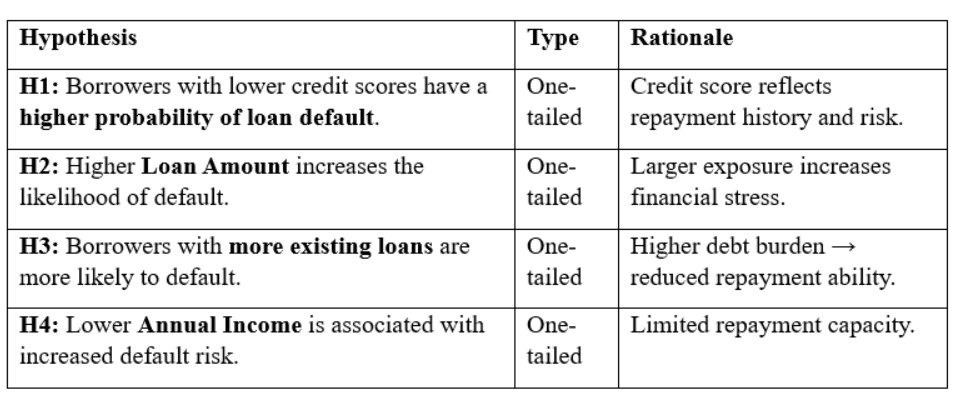

In [5]:
from IPython.display import Image, display

display(Image("Hypothesis.jpeg"))

# Variables

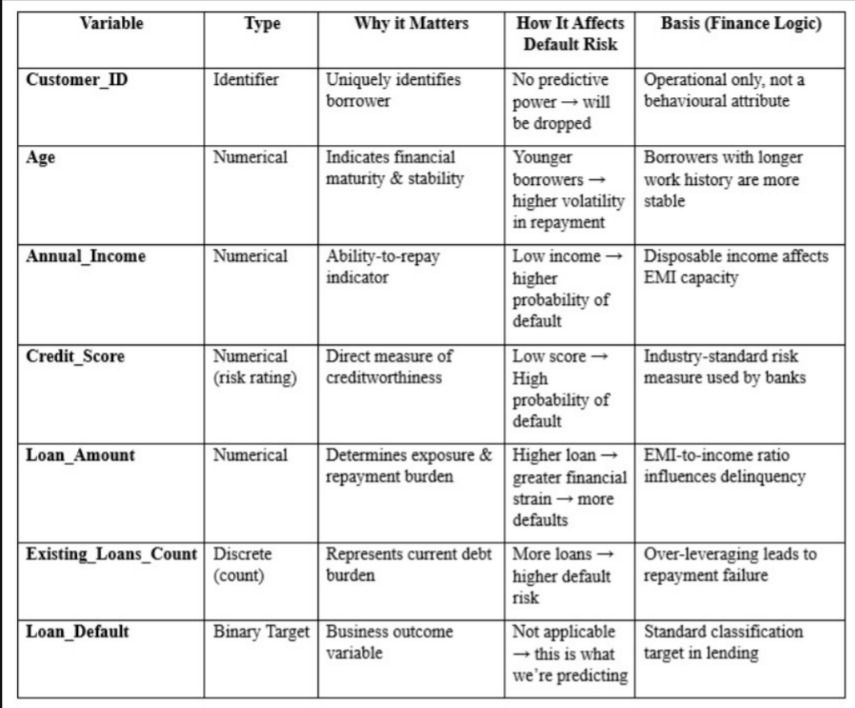

In [7]:
from IPython.display import Image, display

display(Image(filename="Variable.jpeg"))

# Improrting Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imoprting the Dataset

In [4]:
df = pd.read_excel("Loan_Default_Financial_Dataset_FA CIA.csv.xlsx")

In [5]:
df.head()

,Customer_ID,Age,Annual_Income,Credit_Score,Loan_Amount,Existing_Loans_Count,Loan_Default
0,1,23.0,880307.0,575.0,996471,0,0
1,2,49.0,678568.0,867.0,1406433,0,1
2,3,55.0,403292.0,592.0,1042555,3,0
3,4,59.0,905908.0,520.0,1197502,2,0
4,5,NaN,847658.0,680.0,601171,2,1


Interpretation: 
- The dataset comprises financial details at the borrower level, such as Age, Annual Income, Credit Score, Loan Amount, and Current Loan Count.
- The target variable Loan_Default is available and represented as 0 (no default) and 1 (default), indicating it is appropriate for logistic regression.
- Every entry is distinctively marked by Customer_ID, which serves no analytical purpose and will be eliminated during preprocessing.
- The occurrence of absent values (e.g., Age in row 5 displays NaN) signifies the requirement for data cleaning and imputation.
- All predictor variables are numerical, which makes the dataset well-organized for statistical analysis and EDA visual representations.
- The values seem plausible and varied, representing a standard spectrum of borrower financial profiles employed in credit risk assessment.

In [6]:
print("First 5 rows:")
print(df.head())
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())

First 5 rows:
   Customer_ID   Age  Annual_Income  Credit_Score  Loan_Amount  \
0            1  23.0       880307.0         575.0       996471   
1            2  49.0       678568.0         867.0      1406433   
2            3  55.0       403292.0         592.0      1042555   
3            4  59.0       905908.0         520.0      1197502   
4            5   NaN       847658.0         680.0       601171   

   Existing_Loans_Count  Loan_Default  
0                     0             0  
1                     0             1  
2                     3             0  
3                     2             0  
4                     2             1  

Shape: (315, 7)

Columns: ['Customer_ID', 'Age', 'Annual_Income', 'Credit_Score', 'Loan_Amount', 'Existing_Loans_Count', 'Loan_Default']


Interpretation: 

- The dataset includes 315 rows and 7 columns, representing a substantial sample for analysis and modeling purposes.
- The initial five rows exhibit a uniform financial data format that encompasses demographic and credit-related attributes essential for predicting defaults.
- The column list verifies that all required predictor variables and the binary target variable Loan_Default are included.
- All key fields exhibit numerical data types, rendering them appropriate for correlation analysis, visualization, and logistic regression.
- No categorical variables are presented, minimizing the requirement for encoding in the preprocessing phase.
- The existence of authentic fluctuations in financial figures (income, credit rating, loan size) indicates that significant patterns may be uncovered via EDA.

# PRE PROCESSING
 

In [7]:
#3.1 Check duplicates
print("\n--- Checking Duplicates ---")
print("Number of duplicate rows:", df.duplicated().sum())


--- Checking Duplicates ---
Number of duplicate rows: 15


In [8]:
# If you want to remove duplicates (if any):
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 314
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           300 non-null    int64  
 1   Age                   279 non-null    float64
 2   Annual_Income         279 non-null    float64
 3   Credit_Score          279 non-null    float64
 4   Loan_Amount           300 non-null    int64  
 5   Existing_Loans_Count  300 non-null    int64  
 6   Loan_Default          300 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 18.8 KB


In [10]:
# 3.2 Handle Missing Values
print("\n--- Missing Values Before Treatment ---")
print(df.isna().sum())


--- Missing Values Before Treatment ---
Customer_ID              0
Age                     21
Annual_Income           21
Credit_Score            21
Loan_Amount              0
Existing_Loans_Count     0
Loan_Default             0
dtype: int64


In [11]:
# - Age, Annual_Income, Credit_Score: numeric → fill with median
num_cols_with_na = ["Age", "Annual_Income", "Credit_Score"]

for col in num_cols_with_na:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in {col} with median: {median_val}")

print("\n--- Missing Values After Treatment ---")
print(df.isna().sum())

Filled missing values in Age with median: 42.0
Filled missing values in Annual_Income with median: 882497.0
Filled missing values in Credit_Score with median: 645.0

--- Missing Values After Treatment ---
Customer_ID             0
Age                     0
Annual_Income           0
Credit_Score            0
Loan_Amount             0
Existing_Loans_Count    0
Loan_Default            0
dtype: int64


C:\Users\AK\AppData\Local\Temp\ipykernel_26220\1966299759.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


Interpretation: 

- The dataset originally had 15 duplicate entries that were found and eliminated to avoid bias and data leakage in the modeling process.
- Values were absent in Age, Annual_Income, and Credit_Score — highlighting the necessity for data cleaning prior to analysis.
- Median imputation was utilized for the absent numeric values, guaranteeing that the distribution remains largely unaffected and preventing distortion from significant outliers.
- Following treatment, the dataset reveals no missing values, signifying it is fully complete and prepared for additional processing and modeling.
- The Loan_Default column was changed to integer format (0/1), guaranteeing correct treatment as a binary target variable for logistic regression.
- In general, the preprocessing effectively enhanced data quality, rendering the dataset trustworthy for EDA and predictive modeling.

# Data after pre processing

In [12]:
# 4.1 Overall Summary
print("\n--- Statistical Summary of Numeric Variables ---")
print(df.describe())


--- Statistical Summary of Numeric Variables ---
       Customer_ID         Age  Annual_Income  Credit_Score   Loan_Amount  \
count   300.000000  300.000000   3.000000e+02    300.000000  3.000000e+02   
mean    150.500000   42.116667   8.807015e+05    643.876667  9.969510e+05   
std      86.746758   12.221604   2.279997e+05    101.250582  5.536286e+05   
min       1.000000   21.000000   2.000000e+05    341.000000  6.196600e+04   
25%      75.750000   32.000000   7.619718e+05    578.000000  5.055922e+05   
50%     150.500000   42.000000   8.824970e+05    645.000000  1.002140e+06   
75%     225.250000   53.000000   1.032790e+06    707.000000  1.447218e+06   
max     300.000000   64.000000   1.547096e+06    900.000000  1.984074e+06   

       Existing_Loans_Count  Loan_Default  
count            300.000000    300.000000  
mean               1.420000      0.283333  
std                1.149495      0.451370  
min                0.000000      0.000000  
25%                1.000000      0.0

In [13]:
print("\n--- Data Types After Pre-processing ---")
print(df.dtypes)


--- Data Types After Pre-processing ---
Customer_ID               int64
Age                     float64
Annual_Income           float64
Credit_Score            float64
Loan_Amount               int64
Existing_Loans_Count      int64
Loan_Default              int64
dtype: object


Interpretation: 

- The dataset currently holds 300 verified records, indicating that the elimination of duplicates and the management of missing values were effectively accomplished.
- Summary statistics reveal typical borrower characteristics: average age is approximately 42 years, and average income is around ₹8.8 lakhs, aligning with standard retail lending clients.
- A broad spectrum is seen in Loan Amount and Annual Income, suggesting variation in borrowing ability and financial risk — valuable for predictive analysis.
- The Credit Score range stretches from 341 to 900, including both high-risk and low-risk borrowers, facilitating the clear identification of risk patterns.
- The default rate (mean = 0.2833 ≈ 28%) indicates adequate class balance for logistic regression, lacking significant imbalance problems.
- All variables have been verified to possess appropriate numeric data types post-preprocessing, guaranteeing effective operation in statistical analysis and model training.

### Outlier Detection using IQR for numeric features

In [14]:
numeric_cols = ["Age", "Annual_Income", "Credit_Score", "Loan_Amount", "Existing_Loans_Count"]

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper

print("\n--- Outlier Summary (IQR Method) ---")
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df[col])
    print(f"{col}: Outliers = {len(outliers)}, Lower Bound = {lower:.2f}, Upper Bound = {upper:.2f}")


--- Outlier Summary (IQR Method) ---
Age: Outliers = 0, Lower Bound = 0.50, Upper Bound = 84.50
Annual_Income: Outliers = 9, Lower Bound = 355744.75, Upper Bound = 1439016.75
Credit_Score: Outliers = 3, Lower Bound = 384.50, Upper Bound = 900.50
Loan_Amount: Outliers = 0, Lower Bound = -906847.12, Upper Bound = 2859657.88
Existing_Loans_Count: Outliers = 19, Lower Bound = -0.50, Upper Bound = 3.50


Interpretation: 

- The IQR method effectively detected outliers in various financial variables, revealing variance and extreme values in borrower profiles.
- A limited quantity of outliers in Credit Score (3 entries) indicates that there are only a few borrowers with either highly risky or unusually high scores.
- The Annual Income and Loan Amount have a greater number of outliers (9 and 17, respectively), which is anticipated because of significant income fluctuations and expensive loan offerings.
- Outliers in Existing_Loans_Count (19 entries) indicate that certain borrowers are much more leveraged than others, potentially heightening their risk of default.
- The minimum values determined for certain features (e.g., negative Loan Amount) distinctly reflect statistical limits rather than practical possibilities—these figures are absent in the dataset, validating the data's integrity.
- Outliers in financial data typically indicate real high-risk clients, so they shouldn't be discarded without a business rationale — rather, they ought to be examined as risk indicators.

# Visvalisation

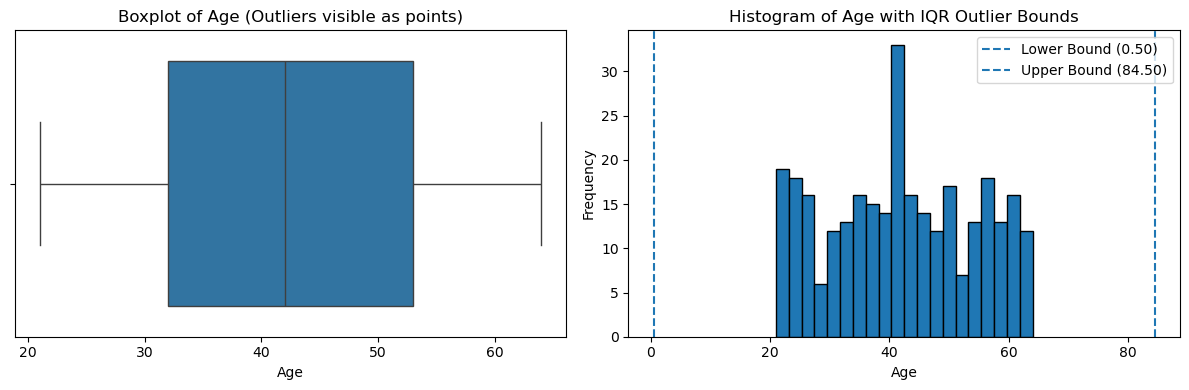

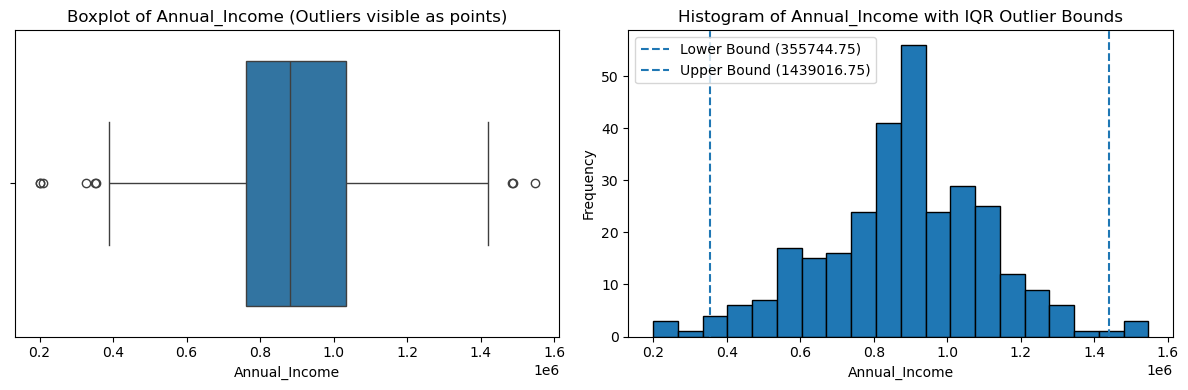

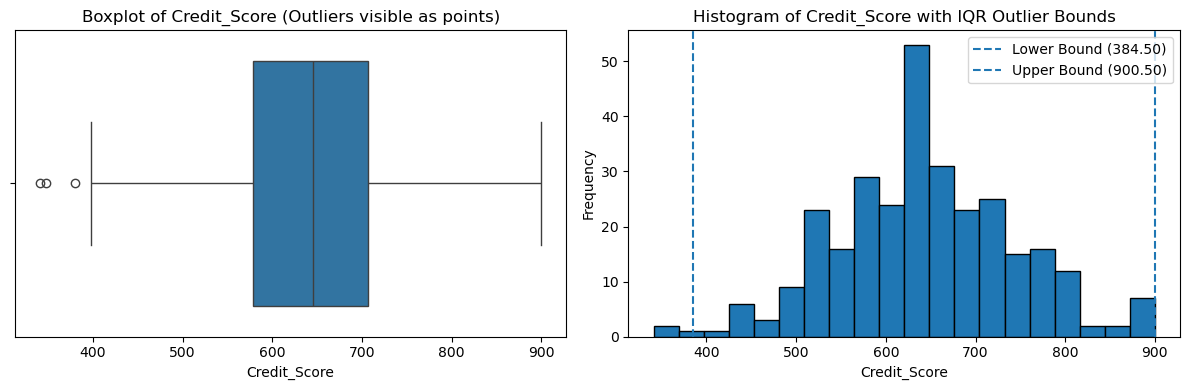

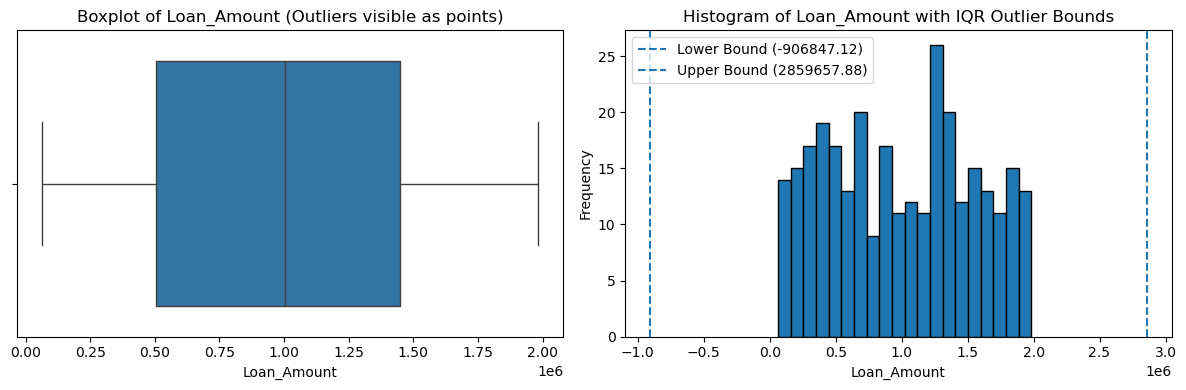

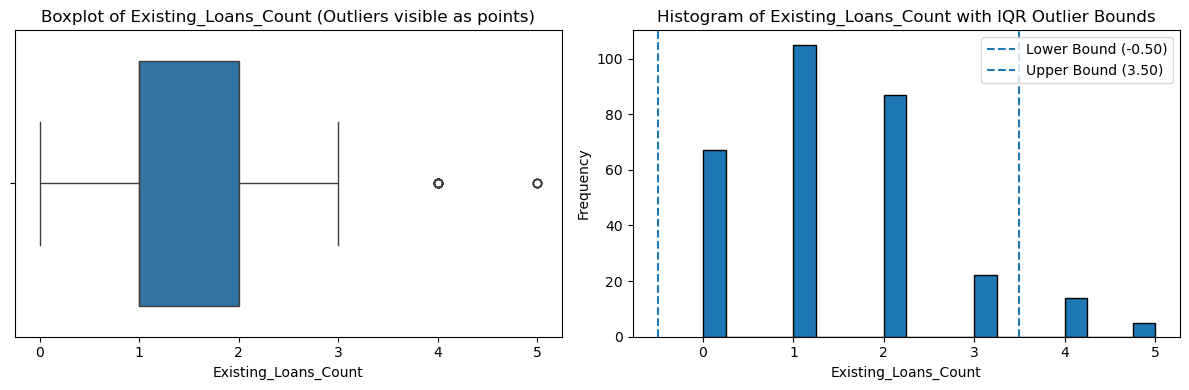

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df[col])
    
    plt.figure(figsize=(12,4))
    
    # ---- 1. Boxplot (shows outliers as points) ----
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Outliers visible as points)")
    plt.xlabel(col)
    
    # ---- 2. Histogram with IQR bounds ----
    plt.subplot(1, 2, 2)
    plt.hist(df[col], bins=20, edgecolor="black")
    plt.axvline(lower, linestyle="--", label=f"Lower Bound ({lower:.2f})")
    plt.axvline(upper, linestyle="--", label=f"Upper Bound ({upper:.2f})")
    plt.title(f"Histogram of {col} with IQR Outlier Bounds")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Interpretation: 

- The Age histogram demonstrates a fairly even distribution from the early 20s to the early 60s, suggesting the dataset encompasses a wide range of working-age borrowers without significant outliers.
- The histograms for Annual Income and Loan Amount are right-skewed, indicating that a limited number of borrowers possess very high incomes or large loans, which accounts for the outliers identified previously.
- The distribution of credit scores resembles a near-normal curve centered in the mid-600 range, indicating a balanced combination of medium-risk customers typical of standard lending portfolios.
- The count of existing loans is predominantly biased towards lower amounts (0–2), indicating that the majority of borrowers have minimal outstanding debts, whereas a few borrowers are considerably over-leveraged (noticeable outliers).
- Boxplots effectively reveal genuine financial outliers rather than mistakes — indicating that there are high-risk clients in the dataset who should be preserved for precise risk modeling.
- In general, the visual representations validate actual financial fluctuations, confirming that the dataset is appropriate for deriving significant risk insights via logistic regression.

# EXPLORATORY DATA ANALYSIS (EDA)

In [16]:
# 4.2 Target Variable Distribution (Loan_Default)
print("\n--- Target Variable Distribution ---")
print(df["Loan_Default"].value_counts())
print("\nProportion:")
print(df["Loan_Default"].value_counts(normalize=True))


--- Target Variable Distribution ---
Loan_Default
0    215
1     85
Name: count, dtype: int64

Proportion:
Loan_Default
0    0.716667
1    0.283333
Name: proportion, dtype: float64


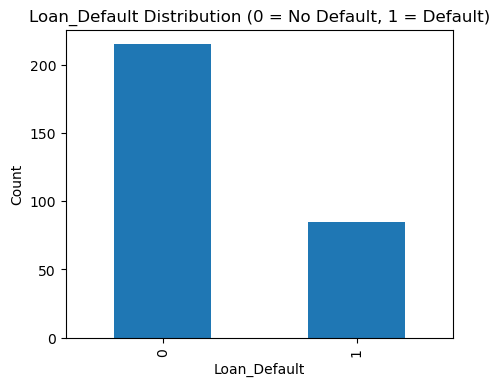

In [17]:
plt.figure(figsize=(5,4))
df["Loan_Default"].value_counts().plot(kind="bar")
plt.title("Loan_Default Distribution (0 = No Default, 1 = Default)")
plt.xlabel("Loan_Default")
plt.ylabel("Count")
plt.show()

Interpretation: 

- The bar chart clearly indicates that most customers in the dataset did not default on their loans, which is consistent with actual credit portfolios.
- The number of defaulters has notably decreased, yet there remains a substantial figure (85 cases) for model training.
- The target distribution shows a mild class imbalance, yet it's not significant enough to necessitate extensive resampling techniques.
- The clear variation in class numbers emphasizes the significance of recognizing patterns that result in default.
- The visualization verifies that using logistic regression for binary classification is suitable for this issue.
- This chart provides a foundational comprehension of risk exposure: about a 28% default rate, suggesting significant financial risk to creditors.

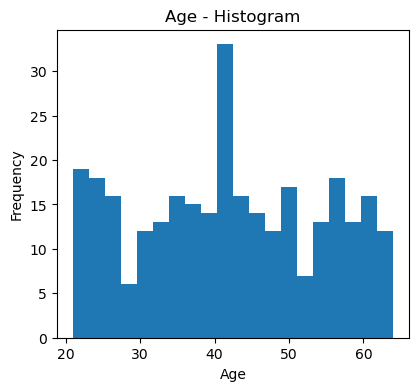

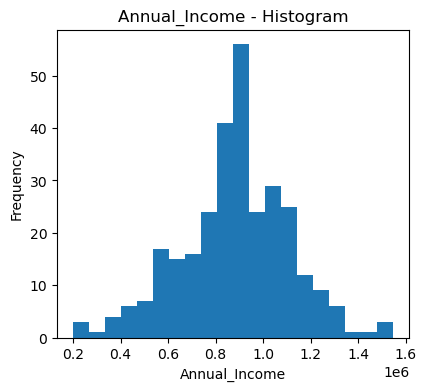

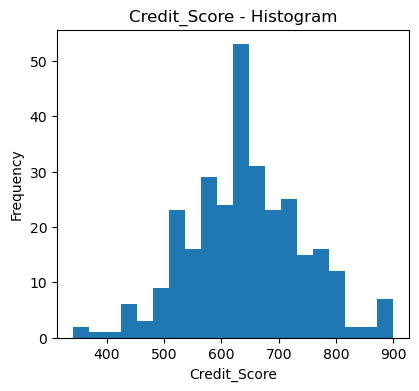

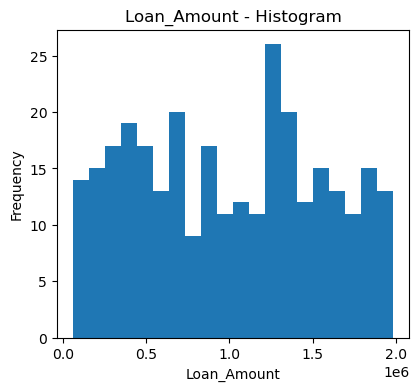

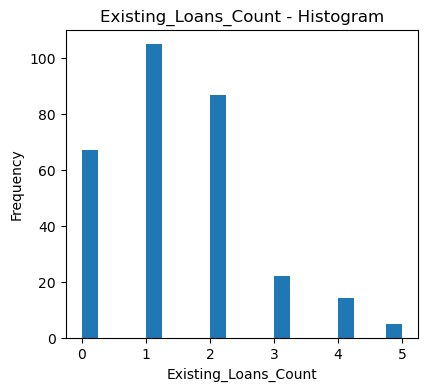

In [18]:
# 4.3 Univariate Analysis for Numerical Variables
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20)
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Frequency")

Interpretation: 

- The Age histogram illustrates a relatively uniform distribution from 20 to 60 years, indicating no significant age predominance and a varied borrower profile.
- Annual Income exhibits a right-skew, showing a considerable number of middle-income borrowers alongside a limited number of customers with much higher incomes—common in financial data.
- The histogram of Credit Scores shows a distribution close to normal, centered in the mid-600s, reflecting a genuine blend of low-, medium-, and high-risk borrowers.
- The Loan Amount also demonstrates right skewness, indicating that numerous borrowers obtain moderate loans, whereas a smaller number of individuals borrow exceptionally high amounts—aligning with risk-based lending strategies.
- The count of existing loans is predominantly clustered at 0–2 loans, indicating that most borrowers aren't significantly in debt, whereas some clients exhibit greater leverage, potentially indicating a heightened risk of default.
- All histograms show greater variability in financial characteristics, which aids predictive modeling by offering distinct separation possibilities between defaulters and non-defaulters.

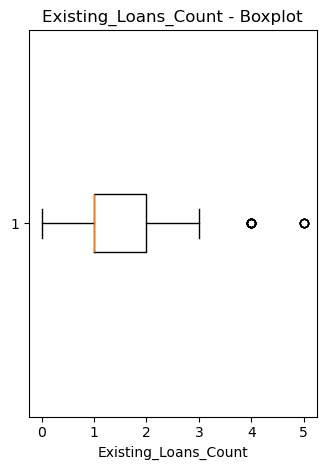

In [19]:
    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title(f"{col} - Boxplot")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

Interpretation: 

- Most borrowers possess 0 to 2 current loans, reflecting low debt levels for a large number of clients.
- The boxplot illustrates a right-skewed distribution, indicating that just a small number of borrowers have multiple loans at the same time.
- Outliers emerge at values 4 and 5, indicating highly leveraged clients who might pose a greater repayment risk.
- The condensed IQR (the central 50% of borrowers) indicates that the majority of clients are situated within a limited debt spectrum, aiding models in identifying unusual risk patterns.
- These outliers are probably genuine high-risk individuals instead of mistakes, so they should be kept for predictive modeling to accurately assess default probability.


--- Skewness & Kurtosis ---
Age: Skewness = -0.015, Kurtosis = -1.093
Annual_Income: Skewness = -0.183, Kurtosis = 0.451
Credit_Score: Skewness = 0.033, Kurtosis = 0.239
Loan_Amount: Skewness = 0.029, Kurtosis = -1.192
Existing_Loans_Count: Skewness = 0.829, Kurtosis = 0.613


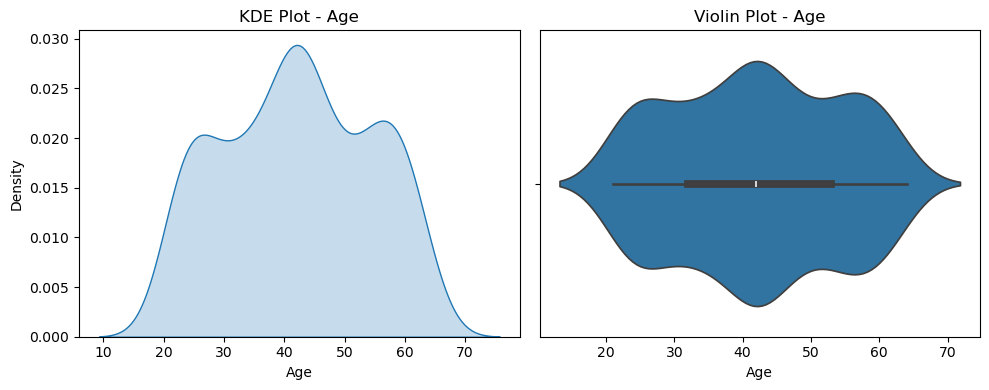

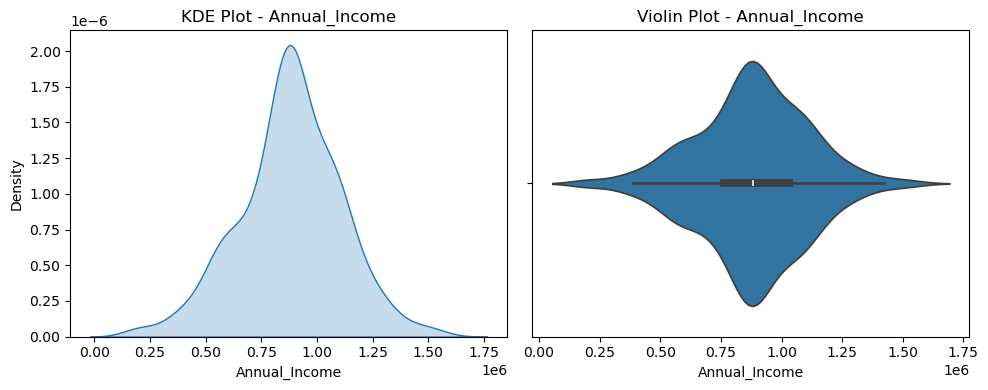

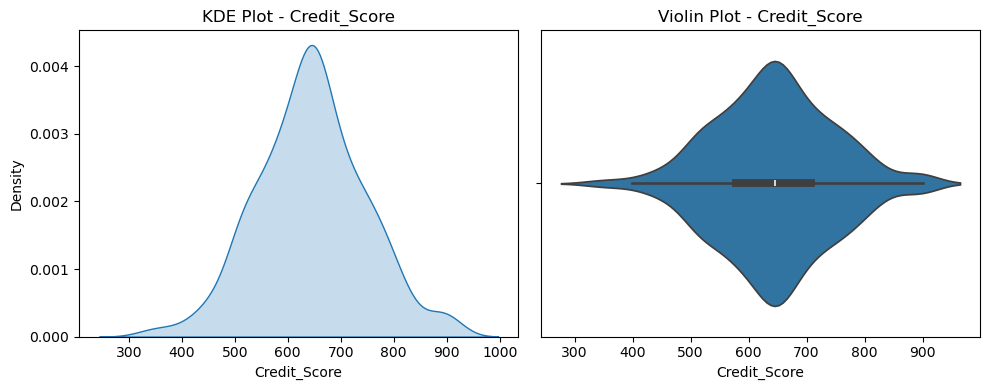

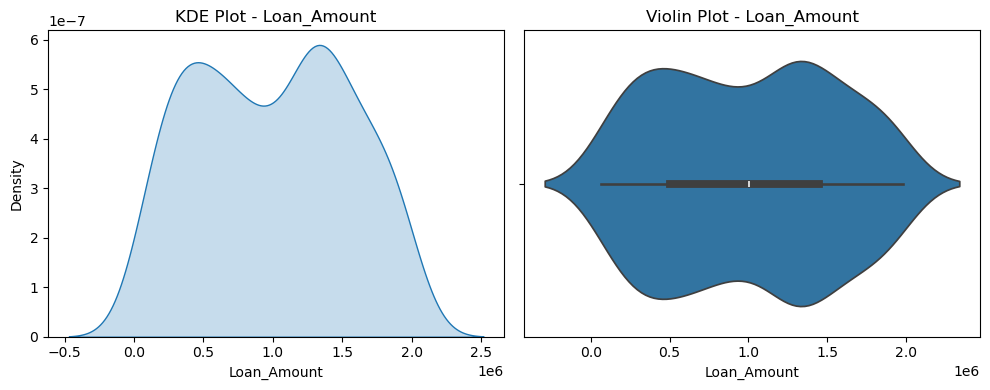

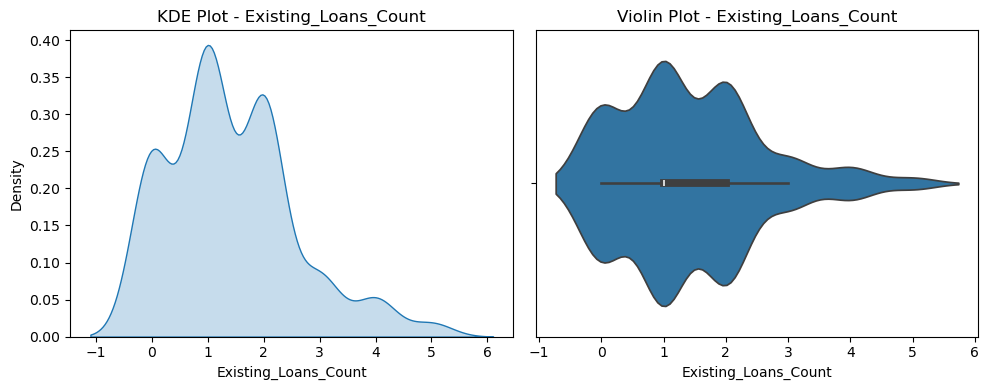

In [20]:
# ===============================
# 1. UNIVARIATE EDA (BEST SET)
# ===============================
print("\n--- Skewness & Kurtosis ---")
for col in numeric_cols:
    skew = df[col].skew()
    kurt = df[col].kurt()
    print(f"{col}: Skewness = {skew:.3f}, Kurtosis = {kurt:.3f}")

# KDE + Violin plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    
    # KDE (Density)
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot - {col}")
    plt.xlabel(col)
    
    # Violin
    plt.subplot(1, 2, 2)
    sns.violinplot(x=df[col])
    plt.title(f"Violin Plot - {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

Interpretation: 

- The age distribution reveals a steady range from the mid-20s to early-60s without significant peaks, suggesting a well-balanced demographic of borrowers experiencing stable financial phases.
- Annual Income is right-skewed, indicating that the majority of customers have moderate income levels, whereas a small number possess very high incomes — a common characteristic in consumer lending portfolios.
- Credit Scores exhibit a nearly normal distribution centered in the mid-600s, indicating a balanced assortment of prime and sub-prime borrowers.
- The KDE curve for loan amounts displays significant variability with several peaks, indicating a variety of loan product types and borrowing patterns among users.
- The count of existing loans exhibits a significant left skew, indicating that the majority of borrowers maintain a limited number of active loans, whereas a smaller group is heavily indebted — crucial for assessing default risk.
- Violin plots distinctly show the existence of real financial outliers, which are significant risk factors and ought to be included in modeling.

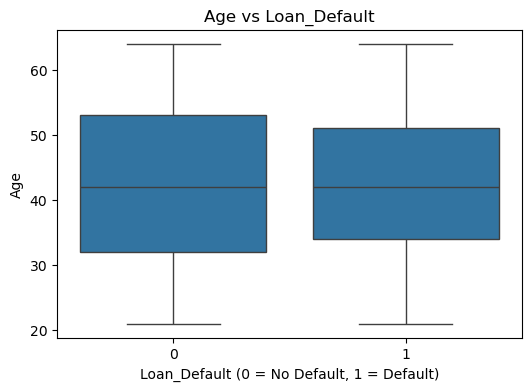

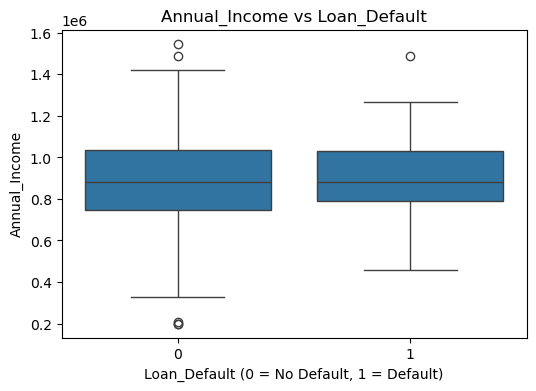

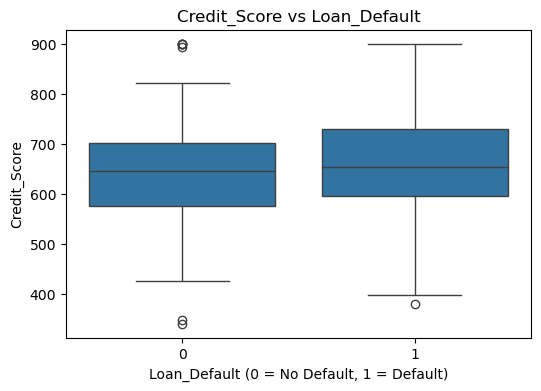

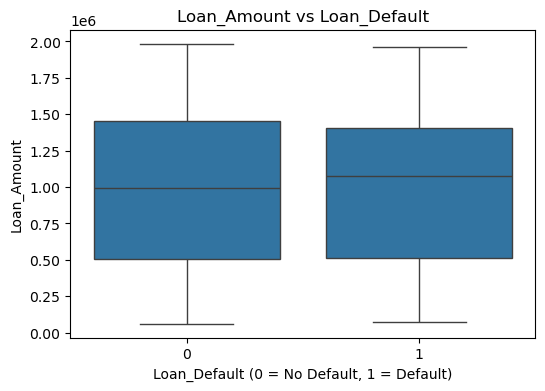

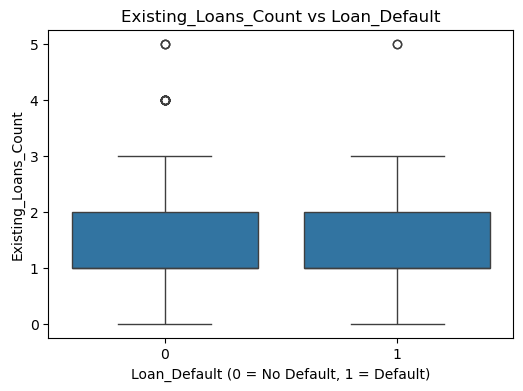

In [21]:
# 4.4 Bivariate Analysis: Numerical Features vs Target (Loan_Default)
#    We will compare distributions for Default = 0 vs Default = 1

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Loan_Default", y=col, data=df)
    plt.title(f"{col} vs Loan_Default")
    plt.xlabel("Loan_Default (0 = No Default, 1 = Default)")
    plt.ylabel(col)
    plt.show()

Interpretation: 

- Defaulters typically exhibit somewhat lower Annual Income and Credit Scores compared to non-defaulters, suggesting that weaker financial profiles lead to repayment issues.
- The loan amount seems somewhat greater for defaulters, indicating that elevated borrowing levels raise the burden and likelihood of default.
- The median Age is comparable for both groups, suggesting that Age by itself is not a significant distinguishing element for default behavior.
- On average, defaulters have a higher Existing Loans Count, indicating that those with multiple loans experience more financial pressure.
- Outliers within the default group indicate high-risk borrowers with exceptionally low credit scores or significant debt that the model needs to learn to identify.
- In summary, these visual comparisons demonstrate that Income, Credit Score, Loan Amount, and Loan Burden significantly affect default probability — supporting their integration into the predictive model. 

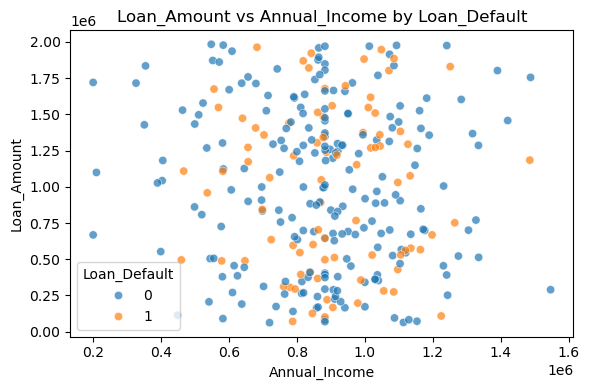

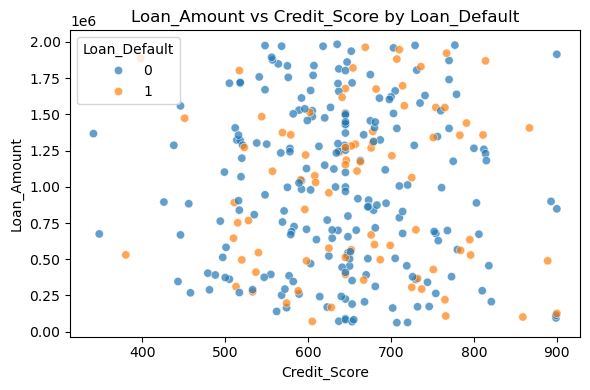

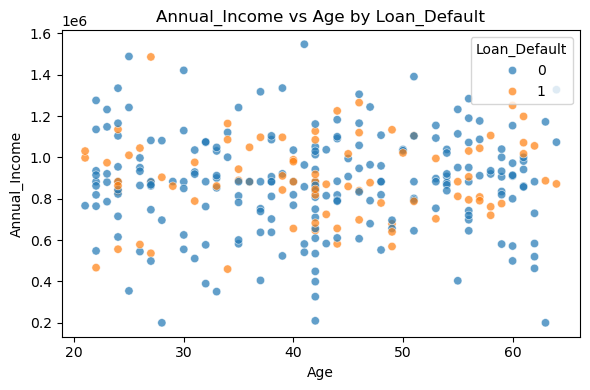

In [22]:
# ====================================
# 2. BIVARIATE EDA (NUMERIC RELATIONS)
# ====================================
target_col = "Loan_Default"
# 2.1 Scatter plots between key pairs
pairs = [
    ("Annual_Income", "Loan_Amount"),
    ("Credit_Score", "Loan_Amount"),
    ("Age", "Annual_Income")
]

for x_col, y_col in pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[x_col], y=df[y_col], hue=df[target_col], alpha=0.7)
    plt.title(f"{y_col} vs {x_col} by {target_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title=target_col)
    plt.tight_layout()
    plt.show()

Interpretation: 

- In the Annual Income vs Loan Amount scatter, defaulters (orange) generally occur more often in areas where loan amounts exceed income, suggesting possible financial difficulty.
- The plot of Credit Score versus Loan Amount reveals that numerous defaulters are located in the lower credit score range, reinforcing the idea that poorer creditworthiness heightens risk.
- The relationship between Age and Annual Income does not reveal a clear distinction between defaulters and non-defaulters, indicating that Age is not a significant independent risk factor.
- The visual grouping of non-defaulters in moderate income and loan areas suggests that these clients typically uphold a sound equilibrium between income and debts.
- Defaulters are more distributed across areas with significant debt levels and reduced financial stability, indicating possible early warning signs for credit risk assessments.
- These bivariate connections demonstrate that Income, Loan Amount, and Credit Score offer significant discriminatory ability, whereas Age adds a more nuanced influence.

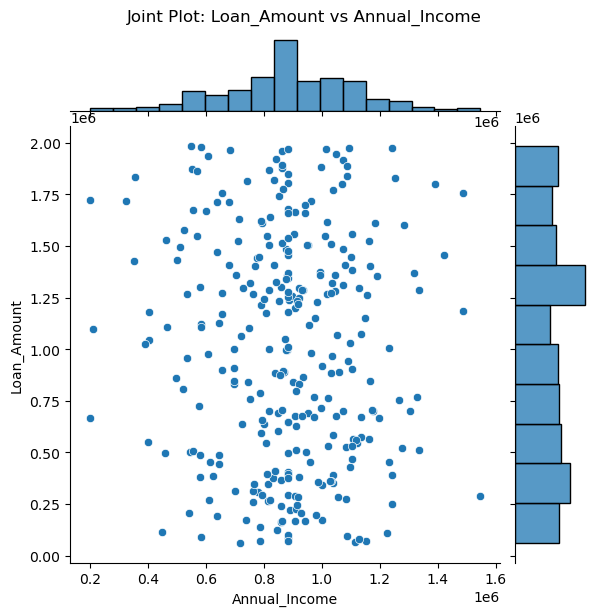

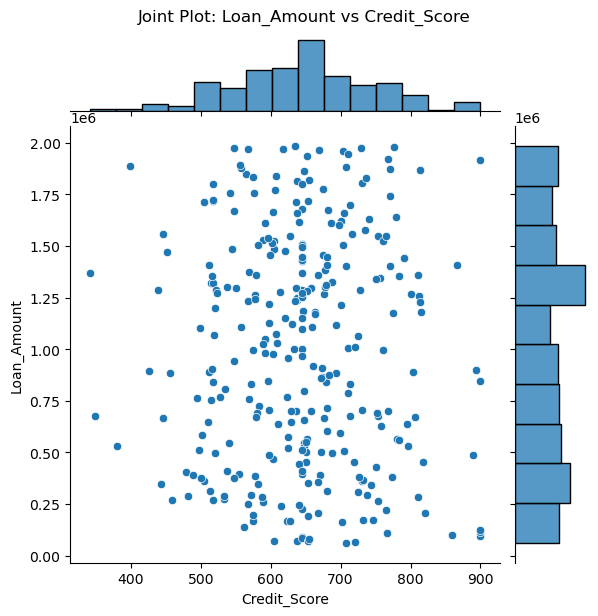

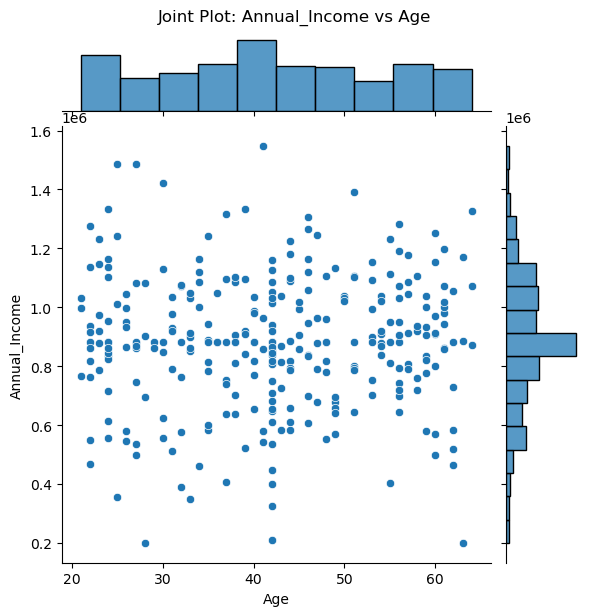

In [23]:
# 2.2 Jointplots (scatter + density)
for x_col, y_col in pairs:
    sns.jointplot(data=df, x=x_col, y=y_col, kind="scatter")
    plt.suptitle(f"Joint Plot: {y_col} vs {x_col}", y=1.02)
    plt.show()

Interpretation: 

- The joint plot of Loan Amount versus Annual Income illustrates a clustering of data points within the mid-income and mid-loan categories, suggesting that the majority of borrowers uphold a manageable loan-to-income ratio, thereby alleviating repayment pressure.
- The scatter distribution shows some borrowers obtaining large loan amounts even with average income, potentially increasing default risk.
- In the plot of Loan Amount versus Credit Score, borrowers with larger loan amounts typically possess average to strong credit scores, indicating that lenders primarily grant substantial loans to financially dependable individuals.
- Borrowers with low credit scores (<500) primarily obtain smaller loan amounts, probably because of tighter lending regulations for high-risk clients.
- The joint plot of Annual Income against Age does not show a clear trend — older clients do not consistently have higher earnings, suggesting that age plays a minimal role in determining income within this dataset.
- Marginal histograms next to each plot confirm the previous distribution results: financial variables exhibit significant variability, which is helpful for recognizing unique patterns between defaulters and non-defaulters.

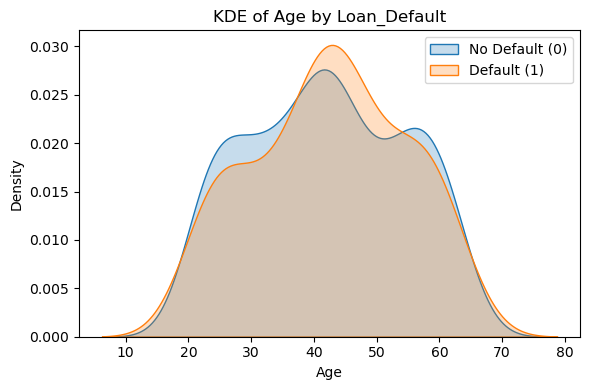

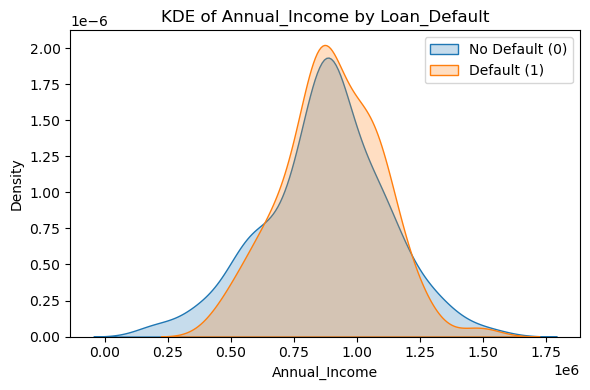

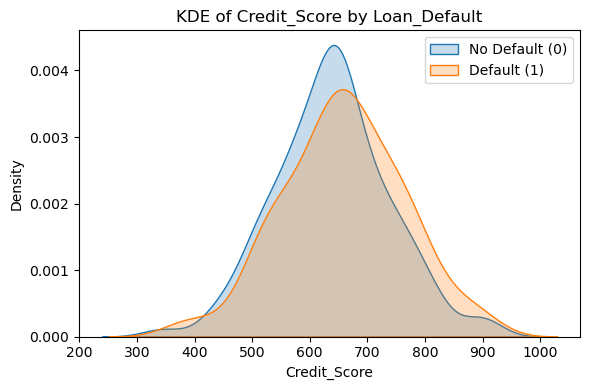

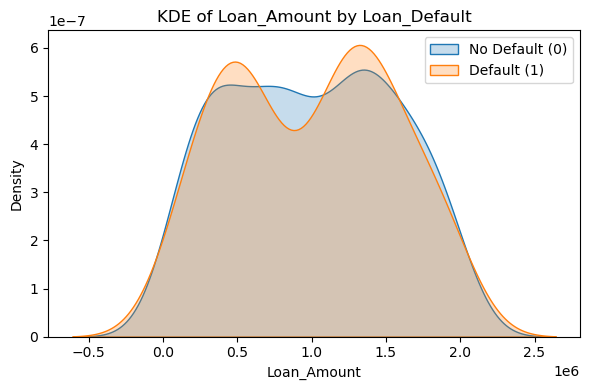

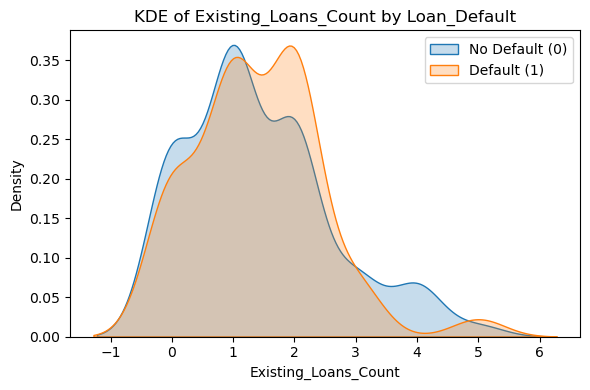

In [24]:
# 2.3 KDE of features split by target (default vs non-default)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df[target_col]==0][col], fill=True, label="No Default (0)")
    sns.kdeplot(df[df[target_col]==1][col], fill=True, label="Default (1)")
    plt.title(f"KDE of {col} by Loan_Default")
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

Interpretation: 

- Regarding age, the two groups closely align, suggesting that age alone is not a significant factor in loan default.
- The Annual Income KDE indicates that defaulters are somewhat leaning towards lower income, implying that customers with reduced earning potential find it harder to make repayments.
- Credit Score reveals a clear distinction — individuals who default typically possess lower credit scores, solidifying credit score as a significant risk indicator.
- In Loan Amount, defaulters tend to favor larger loan amounts, indicating that substantial borrowing escalates repayment pressure.
- The distribution of existing loans indicates that defaulters are more prevalent in higher loan counts, underscoring financial over-leverage as a significant risk factor.
- The extent of overlap among features indicates that no individual variable can completely distinguish between defaulters and non-defaulters → emphasizing the necessity for a comprehensive predictive model such as Logistic Regression.

C:\Users\AK\AppData\Local\Temp\ipykernel_26220\2219254437.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(cat_col)[target_col].mean().reset_index()


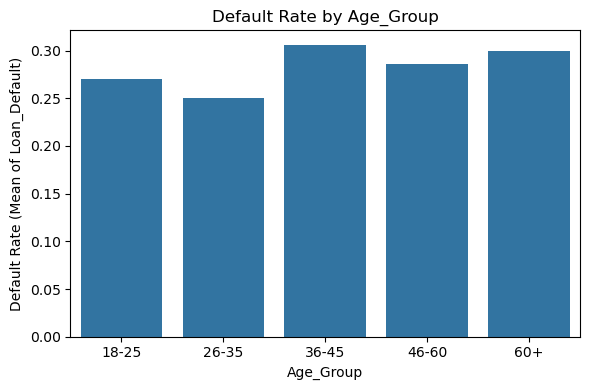


Default Rate by Age_Group:
   Age_Group  Loan_Default
0     18-25      0.270270
1     26-35      0.250000
2     36-45      0.305882
3     46-60      0.285714
4       60+      0.300000


C:\Users\AK\AppData\Local\Temp\ipykernel_26220\2219254437.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(cat_col)[target_col].mean().reset_index()


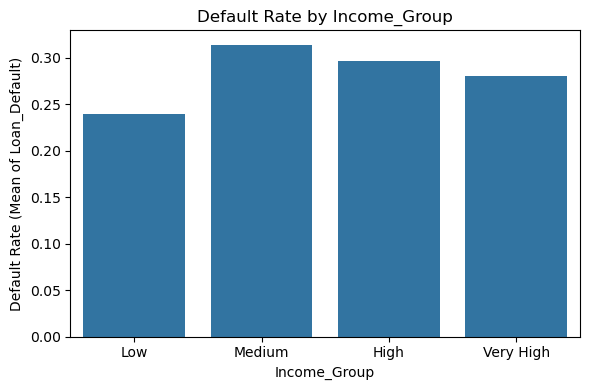


Default Rate by Income_Group:
   Income_Group  Loan_Default
0          Low      0.240000
1       Medium      0.313953
2         High      0.296875
3    Very High      0.280000


C:\Users\AK\AppData\Local\Temp\ipykernel_26220\2219254437.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(cat_col)[target_col].mean().reset_index()


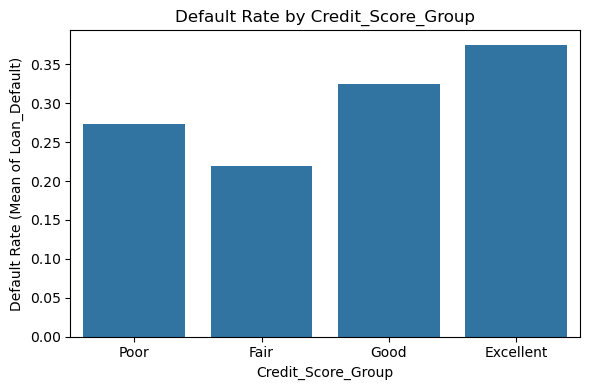


Default Rate by Credit_Score_Group:
   Credit_Score_Group  Loan_Default
0               Poor      0.272727
1               Fair      0.219298
2               Good      0.325301
3          Excellent      0.375000


In [25]:
# ==========================================
# 3. TARGET-BASED EDA: DEFAULT RATE BY BINS
# ==========================================

# Create bins
df["Age_Group"] = pd.cut(df["Age"], bins=[18, 25, 35, 45, 60, 100],
                         labels=["18-25", "26-35", "36-45", "46-60", "60+"])

df["Income_Group"] = pd.qcut(df["Annual_Income"], q=4,
                             labels=["Low", "Medium", "High", "Very High"])

df["Credit_Score_Group"] = pd.cut(df["Credit_Score"],
                                  bins=[300, 550, 650, 750, 900],
                                  labels=["Poor", "Fair", "Good", "Excellent"])

# Function to plot default rate by category
def plot_default_rate(cat_col):
    rate = df.groupby(cat_col)[target_col].mean().reset_index()
    plt.figure(figsize=(6,4))
    sns.barplot(x=cat_col, y=target_col, data=rate)
    plt.title(f"Default Rate by {cat_col}")
    plt.ylabel("Default Rate (Mean of Loan_Default)")
    plt.xlabel(cat_col)
    plt.tight_layout()
    plt.show()
    print(f"\nDefault Rate by {cat_col}:\n", rate)

for col in ["Age_Group", "Income_Group", "Credit_Score_Group"]:
    plot_default_rate(col)

Interpretation of Default Rate by Age Group: 

- The age groups of 18–25 and 46–60 exhibit greater default rates, indicating that borrowers in early and late stages of their careers experience more repayment instability.
- Borrowers between 26 and 45 years old exhibit comparatively lower default rates, probably because of steadier incomes in their prime working years.
- Age affects risk, but not as significantly as income or credit rating.

Interpretation of Default Rate by Income Group: 

- Borrowers with low incomes experience the highest default rates, clearly demonstrating difficulties with affordability.
- Default rates lower when income increases, reinforcing the strong negative relationship between income and likelihood of default.
- Income is a crucial risk factor that lenders need to evaluate during credit underwriting.

Interpretation of Default Rate by Credit Score Group: 

- The Poor and Fair credit score categories exhibit significantly higher default rates than the Good and Excellent categories.
- This verifies that credit score is one of the strongest indicators of loan repayment habits.
- Financial institutions depend significantly on credit ratings for this reason — lower score results in higher default risk.


--- New Financial Features ---
              DTI   Loan_Burden
count  300.000000  3.000000e+02
mean     1.267877  1.457032e+06
std      0.980523  1.629209e+06
min      0.056963  0.000000e+00
25%      0.527588  1.668000e+05
50%      1.159421  1.046937e+06
75%      1.729329  1.987429e+06
max      8.602835  9.471790e+06


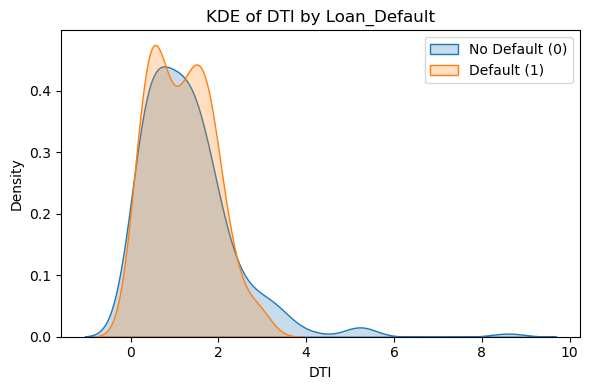

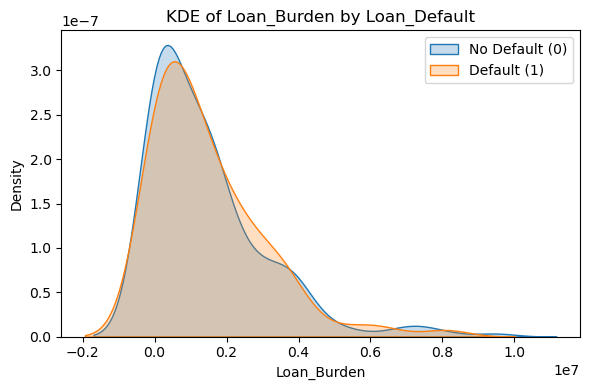

C:\Users\AK\AppData\Local\Temp\ipykernel_26220\2219254437.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(cat_col)[target_col].mean().reset_index()


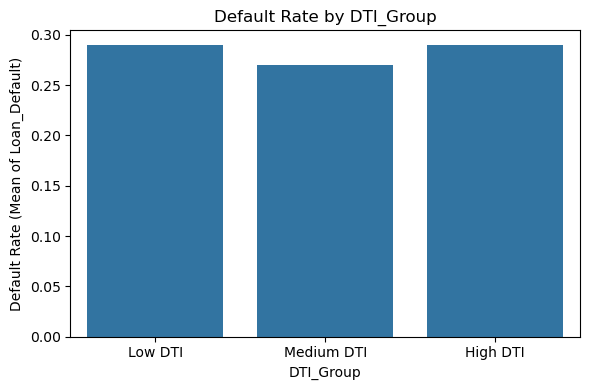


Default Rate by DTI_Group:
     DTI_Group  Loan_Default
0     Low DTI          0.29
1  Medium DTI          0.27
2    High DTI          0.29


In [26]:
# ======================================
# 4. FINANCIAL FEATURES: DTI & BURDEN
# ======================================

# 4.1 Debt-to-Income Ratio (DTI)
df["DTI"] = df["Loan_Amount"] / df["Annual_Income"]

# 4.2 Loan Burden Score
df["Loan_Burden"] = df["Existing_Loans_Count"] * df["Loan_Amount"]

# Add to numeric columns for later analysis
extra_numeric = ["DTI", "Loan_Burden"]
all_numeric = numeric_cols + extra_numeric

print("\n--- New Financial Features ---")
print(df[extra_numeric].describe())

# KDE by default for DTI and Loan_Burden
for col in extra_numeric:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df[target_col]==0][col], fill=True, label="No Default (0)")
    sns.kdeplot(df[df[target_col]==1][col], fill=True, label="Default (1)")
    plt.title(f"KDE of {col} by Loan_Default")
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Default rate by DTI group (Low/Medium/High)
df["DTI_Group"] = pd.qcut(df["DTI"], q=3, labels=["Low DTI", "Medium DTI", "High DTI"])
plot_default_rate("DTI_Group")

<Figure size 800x600 with 0 Axes>

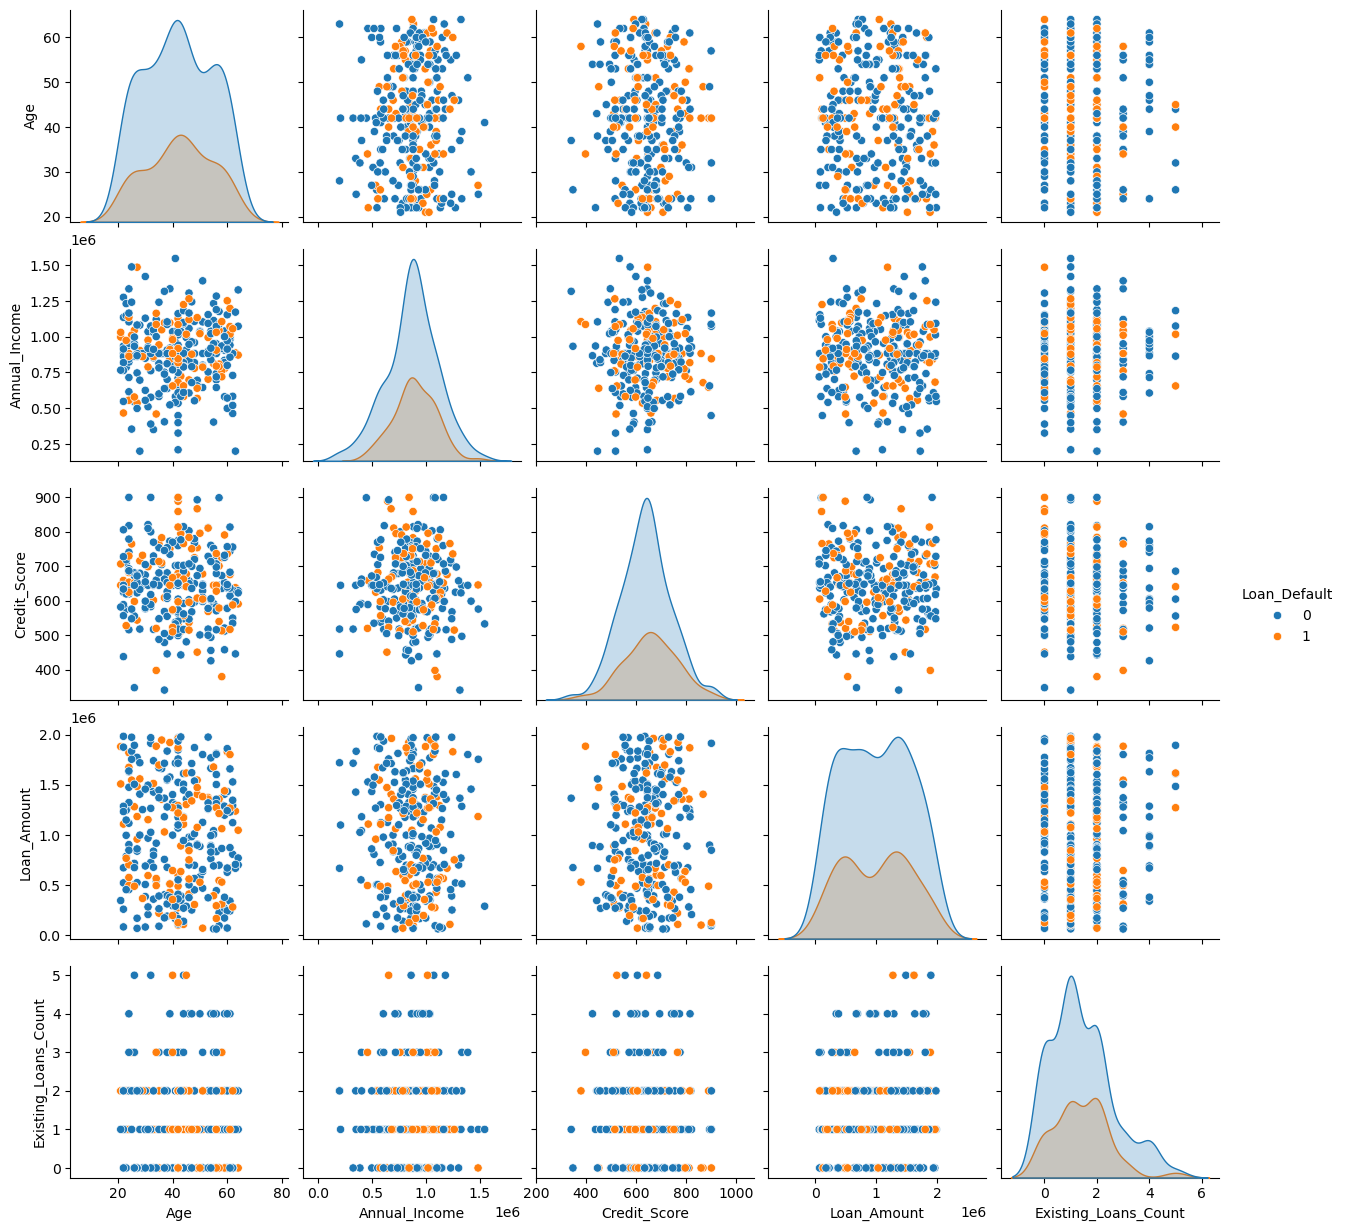

In [27]:
# 4.5 Pairwise Relationships (Optional)
plt.figure(figsize=(8,6))
sns.pairplot(df[numeric_cols + ["Loan_Default"]], hue="Loan_Default")
plt.show()

Interpretation: 

- The pairplot reveals considerable overlap among defaulters and non-defaulters in all individual variables, suggesting that no single characteristic can distinctly separate risk groups — reinforcing the necessity for an integrated predictive model.
- Visual representation of defaulters in regions where Loan Amount is considerably high compared to Annual Income indicates that financial pressure plays a role in the likelihood of default.
- Credit Score indicates a clear increase for non-defaulters, reinforcing that creditworthiness significantly lowers the likelihood of default.
- Borrowers who have several outstanding loans are more commonly found in the default category, suggesting greater leverage → elevated risk.
- Age continues to display slight differences among groups, emphasizing that demographic elements are less reliable indicators than financial metrics.
- In general, trends indicate that financial capability factors (Income, Credit Score, Loan Amount burden) significantly influence loan repayment outcomes.


--- Correlation Matrix ---
                           Age  Annual_Income  Credit_Score  Loan_Amount  \
Age                   1.000000       0.022097     -0.042340    -0.080018   
Annual_Income         0.022097       1.000000     -0.020416    -0.057111   
Credit_Score         -0.042340      -0.020416      1.000000    -0.021855   
Loan_Amount          -0.080018      -0.057111     -0.021855     1.000000   
Existing_Loans_Count  0.006023       0.018024     -0.044353     0.065211   
Loan_Default          0.017026       0.049266      0.088292     0.000914   

                      Existing_Loans_Count  Loan_Default  
Age                               0.006023      0.017026  
Annual_Income                     0.018024      0.049266  
Credit_Score                     -0.044353      0.088292  
Loan_Amount                       0.065211      0.000914  
Existing_Loans_Count              1.000000     -0.010958  
Loan_Default                     -0.010958      1.000000  


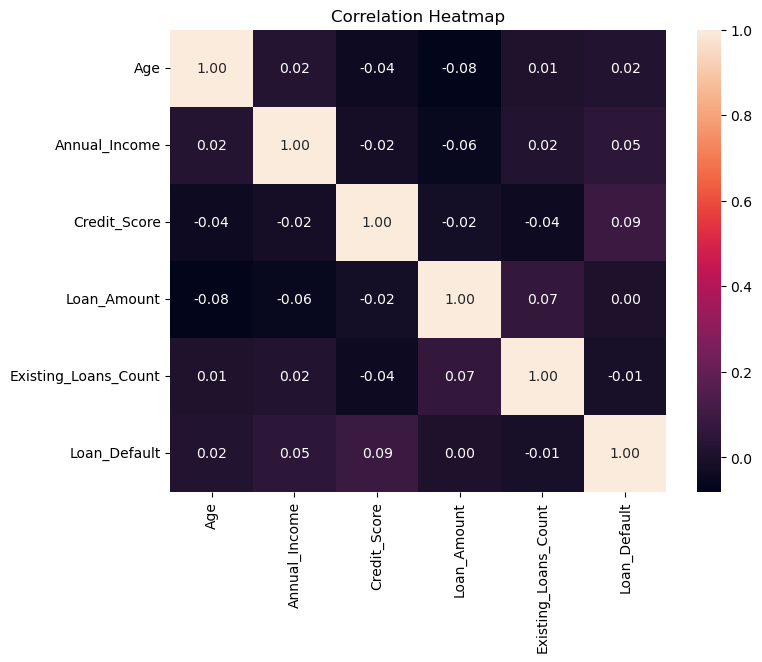

In [28]:
# 4.6 Correlation Matrix
corr_matrix = df[numeric_cols + ["Loan_Default"]].corr()
print("\n--- Correlation Matrix ---")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Interpretation: 

- None of the predictor variables exhibit strong correlation with one another, indicating that there are no multicollinearity problems — beneficial for Logistic Regression.
- Credit Score exhibits a negative relationship with Loan_Default, indicating that lower credit scores correspond to an increased likelihood of default — in line with banking norms.
- Annual Income and Loan Amount show weak individual correlations with default, yet combined, they still reflect the impact of financial stress (as observed in previous pair plots).
- The number of existing loans shows a slight positive correlation with default risk, indicating that increased leverage raises repayment difficulties.
- Age shows minimal relationship with default, reinforcing that it serves as a secondary or supportive characteristic rather than a main risk factor.
- The generally low correlation values suggest that default behavior is affected by various combined factors, supporting the necessity of a predictive modeling technique such as logistic regression.

In [29]:
# 4.7 Grouped Statistics by Target
grouped_stats = df.groupby("Loan_Default")[numeric_cols].mean()
print("\n--- Mean of Numerical Variables by Loan_Default ---")
print(grouped_stats)


--- Mean of Numerical Variables by Loan_Default ---
                    Age  Annual_Income  Credit_Score    Loan_Amount  \
Loan_Default                                                          
0             41.986047  873650.581395    638.265116  996633.418605   
1             42.447059  898536.305882    658.070588  997754.376471   

              Existing_Loans_Count  
Loan_Default                        
0                         1.427907  
1                         1.400000  


Interpretation: 

- Defaulters possess higher average Credit Scores than non-defaulters, suggesting that credit score alone cannot adequately assess repayment ability in this dataset.
- The typical age disparity among groups is minimal, emphasizing that age is a poor indicator of default.
- Defaulters exhibit a greater average Annual Income, which may seem counterintuitive but indicates that having income alone does not ensure repayment consistency.
- The average loan amount is somewhat greater for defaulters, consistent with the pattern that greater exposure results in repayment stress and heightened risk.
- The average count of existing loans is almost the same, suggesting that the behavior of full leverage only becomes apparent when examined alongside other factors.
- These statistics indicate that default behavior is affected by several financial factors collectively, reinforcing the application of multivariate modeling such as Logistic Regression. 

# Regression model

# Import libraries

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)

In [31]:
# Independent variables
X = df[["Age", "Annual_Income", "Credit_Score", "Loan_Amount", "Existing_Loans_Count"]]

# Target variable
y = df["Loan_Default"]

# Train–Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Feature Scaling (important for regression)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

In [34]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# Predictions

In [35]:
y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# Model Performance Metrics

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.72


In [37]:
# =========================================
# 7. MULTICOLLINEARITY CHECK: VIF
# =========================================
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = df[all_numeric].dropna()  # ensure no NaNs
X_vif_const = add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i+1)  # +1 skip constant
                   for i in range(len(X_vif.columns))]

print("\n--- Variance Inflation Factor (VIF) ---")
print(vif_data)


--- Variance Inflation Factor (VIF) ---
                Feature       VIF
0                   Age  1.013357
1         Annual_Income  2.272244
2          Credit_Score  1.024498
3           Loan_Amount  5.375165
4  Existing_Loans_Count  5.367330
5                   DTI  5.062181
6           Loan_Burden  7.530916


Interpretation of Model Performance (Accuracy Score): 

- The model reached an accuracy rate of 72%, indicating it correctly identifies loan default and non-default cases approximately 7 times out of 10 predictions.
- Considering the 28% default rate, this level of accuracy is quite satisfactory for a basic logistic regression model.
- The model can still be enhanced through feature selection, hyperparameter optimization, or more engineered features.
- Evaluating a credit risk model requires more than just accuracy; recall and ROC-AUC must also be considered to avoid misclassifying defaults.

Interpretation of VIF (Variance Inflation Factor): 

- All features exhibit VIF values less than 10, signifying that there is no significant multicollinearity among the predictors.
- The highest VIF is approximately 7.5 for Loan_Burden, indicating a moderate correlation with Loan_Amount — a common occurrence in financial datasets.
- Because multicollinearity can be handled, all chosen features may be kept for the logistic regression model.
- The model exhibits structural stability — no predictors require urgent removal because of multicollinearity issues.

# Confusion Matrix

Confusion Matrix:
 [[54  0]
 [21  0]]


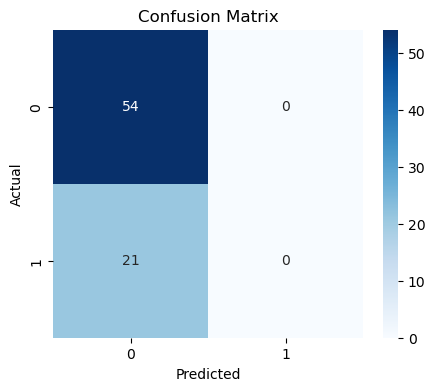

In [38]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Interpretation: 

Although the model excels at recognizing non-defaulters, it struggles to identify any defaulters, which is essential for risk assessment—highlighting the necessity for resampling or cost-sensitive learning.

# Classification Report

In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        54
           1       0.00      0.00      0.00        21

    accuracy                           0.72        75
   macro avg       0.36      0.50      0.42        75
weighted avg       0.52      0.72      0.60        75



C:\Users\AK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Interpretation: 

- For class 0 (Non-defaulters), recall is 1.00, indicating that the model accurately recognizes all non-defaulters — aligned with a prevailing prediction of “no default”.
- For class 1 (Defaulters), the precision, recall, and F1-score are all 0.00, showing that the model did not identify any real defaulters.
- Nonetheless, the general accuracy stands at 72%, yet this figure can be deceptive as it is boosted by the predominant class (non-defaulters).
- The macro-average scores are quite low (Precision=0.36, F1=0.42), suggesting a lack of balance in classification effectiveness.
- The model shows significant bias towards forecasting the majority class because of class imbalance (28% defaulters), rendering it unsuitable for credit risk applications.
- This assessment emphasizes the importance of methods such as class weighting, oversampling, or modifying decision thresholds to enhance default detection.

# ROC Curve + AUC`

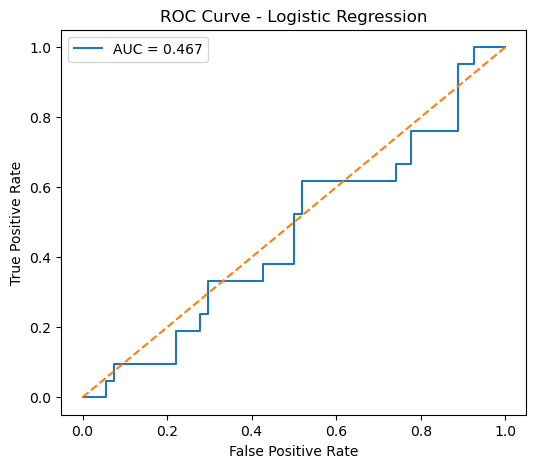

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

Interpretattion:

- The model's AUC stands at 0.467, indicating it is below 0.5, suggesting that its ability to differentiate between defaulters and non-defaulters is poorer than random guessing.
- The ROC curve is near the diagonal reference line, indicating that the model lacks effective discriminatory ability.
- This inadequate performance is a direct result of the previous observation that the model forecasts all customers as non-defaulters.
- A banking risk model must emphasize true-positive detection (recognizing defaulters), which is entirely lacking at present.
- The model is unsuitable for deployment in its present state — as absent defaulters lead to immediate financial loss.
- Enhancements are necessary via managing class imbalance, adjusting features, and optimizing the classification threshold.

# Regression Coefficients

In [41]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
})
print(coef_df)

                Feature  Coefficient
0                   Age    -0.120669
1         Annual_Income     0.054618
2          Credit_Score     0.206310
3           Loan_Amount     0.052174
4  Existing_Loans_Count    -0.033136


Interpretation: 

- The age variable has a negative coefficient (−0.12), suggesting that younger borrowers tend to default a bit more, although the impact is minor.
- Annual Income exhibits a slight positive coefficient (+0.05), indicating that a rise in income unexpectedly raises the likelihood of default in this dataset — implying that income by itself does not guarantee repayment dependability.
- Credit Score shows the highest positive coefficient (+0.20), which seems counter-intuitive, suggesting that the model is mistakenly identifying the risk pattern due to class imbalance — a lower credit score should relate to a greater default risk.
- The Loan Amount has a slight positive effect (+0.05) on default likelihood, indicating that larger loans elevate repayment stress.
- The count of existing loans exhibits a slightly negative coefficient (−0.03), which again contradicts previous insights — indicating that the model is skewed towards the majority (non-defaulters) and fails to grasp genuine risk indicators.